In [ ]:
!unzip /content/drive/MyDrive/kagglecatsanddogs.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os # for directory operations
import cv2

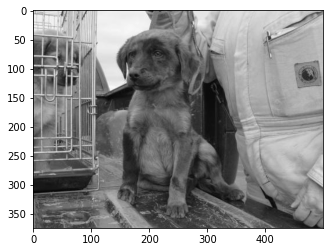

In [14]:
DATADIR = '/content/PetImages'
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # e.g. /content/PetImages/Dog
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # read each image with grayscale
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

In [15]:
print(img_array.shape)

(375, 500)


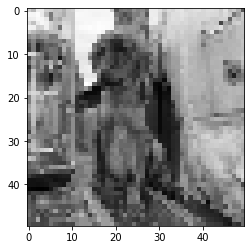

In [17]:
# now we need to notmalize all iamges to be of the same shape
IMG_SIZE = 50 # assume we want 50x50 size

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

# from the below image, we still can tell that the picture is of a dog, 
# so we will stick with 50x50 and will see how this affects our model

In [18]:
training_data = []

def create_dataset():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # e.g. /content/PetImages/Dog
    class_num = CATEGORIES.index(category) # we get the indexes to be our classes
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # read each image with grayscale
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num]) # this appends the data point and its class
      except:
        pass

create_dataset()

In [19]:
print(len(training_data))

24921


In [23]:
# we shuffle the data to randomly organize the dataset so there are no imbalances
import random

random.shuffle(training_data)

for sample in training_data[:10]:
  print(sample[1]) # note how are samples are not organized in a certain order, this will help  the nueral network to not be biased


0
0
1
1
1
1
0
0
1
1


In [24]:
# we will not split the data to train/test, we will split our features and labels
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

# we also need to convert the lists to np arrays becuase keras does not accept a list
# and also a reshape is required
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# -1 means all
# we want the size to be the same size of each feature which is IMG_SIZE
# and 1 is becuase we have gray scale i.e. depth 1

In [26]:
# we will save X, and y to use them in a different notebook
import pickle

data_out = open("X.pickle", "wb")
pickle.dump(X, data_out)
data_out.close()

data_out = open("y.pickle", "wb")
pickle.dump(y, data_out)
data_out.close()